In [1]:
from dataloader_comma import *
from torch.utils.data import DataLoader
from module import pad_collate
import matplotlib.pyplot as plt 
from scipy.signal import savgol_filter  



/home/jessica/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
dataset = CommaDataset(dataset_type='val', multitask=True)

len 6


In [3]:
dl = DataLoader(dataset, batch_size=1, num_workers=1, collate_fn=pad_collate)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([240, 3, 224, 224]) torch.Size([240]) torch.Size([240])
0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

torch.Size([240, 3, 224, 224]) torch.Size([240]) torch.Size([240])
1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

torch.Size([240, 3, 224, 224]) torch.Size([240]) torch.Size([240])
2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

torch.Size([86, 3, 224, 224]) torch.Size([86]) torch.Size([86])
3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


IndexError: index 83 is out of bounds for dimension 0 with size 83

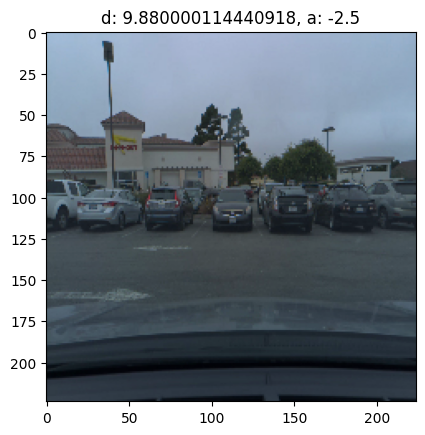

In [4]:
for i, batch in enumerate(dl):
    meta, image_array, vego, angle, distance, m_lens, i_lens, s_lens, a_lens, d_lens = batch

    image_array, vego, angle = image_array[0][1::5], vego[0][1::5], angle[0][1::5]
    print(image_array.shape, vego.shape, angle.shape)
    #df['distance'] = distance[0]
    #sfilt = savgol_filter(s, window_length=30, mode='nearest')
    #plt.plot(sfilt)
    #plt.plot(s)
    #plt.show()
    #plt.savefig(f'images_comma/{i}.png')
    print(i)
    for j in range(image_array.shape[0]):
        
        elem = image_array[j,:,:].permute(1,2,0)
        d = distance[0][j]
        assert((distance < 0).sum() == 0)
        a = angle[j]
        plt.imshow(np.array(elem).astype(int))
        plt.title(f"d: {d}, a: {a}")
        plt.savefig(f'images_comma/{i}_{j}.png')
    if i > 5: break
        


In [36]:
import pandas as pd
s = pd.Series(distance[0])
s.shape

(100,)

In [48]:
s = s.apply(lambda x: 0 if x > 60 or x <=0 else x)

In [49]:
sfilt = savgol_filter(s, window_length=30, polyorder=3)

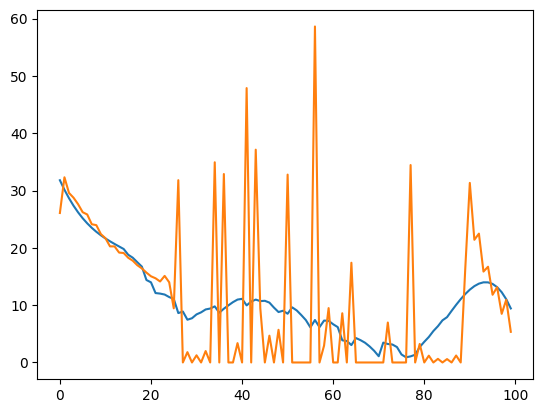

In [24]:
hampel(s, window_size=30, n=1, imputation=True).to_list()

[26.08612823486328,
 32.3187141418457,
 29.585147857666016,
 28.74810218811035,
 27.617727279663086,
 26.226598739624023,
 25.82706642150879,
 24.120628356933594,
 23.966896057128906,
 22.402542114257812,
 21.68364906311035,
 20.26364517211914,
 20.25647735595703,
 19.176227569580078,
 19.106395721435547,
 18.272048950195312,
 17.759817123413086,
 16.970312118530273,
 16.414653778076172,
 15.679743766784668,
 15.04106330871582,
 14.692719459533691,
 14.136428833007812,
 15.111186981201172,
 13.990883827209473,
 9.45240592956543,
 31.814565658569336,
 18.0159330368042,
 1.803236722946167,
 -1.3777210712432861,
 1.2512775659561157,
 -1.3792307376861572,
 1.9925588369369507,
 17.36506462097168,
 34.936065673828125,
 16.692482948303223,
 32.886009216308594,
 -2.532832145690918,
 -0.8492258191108704,
 3.3775157928466797,
 16.692482948303223,
 16.692482948303223,
 16.04719877243042,
 37.13652801513672,
 9.469500541687012,
 -5.366308212280273,
 4.675870418548584,
 -4.763923645019531,
 5.70051